## FYS-STK4155 
## Project 2 - Logistic Regression


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import os

import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter, LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import mean_squared_error
from sklearn import datasets

from mylearn.linear_model import LinearRegression, RidgeRegression, GDRegressor
from mylearn.logisticreg import MultiClassLogisticRegression
from mylearn.ml_tools import *
from mylearn.project_tools import fig_path

from imageio import imread
from numpy.random import normal, uniform

# Set fontsizes in figures
params = {'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'legend.fontsize': 'large',
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.rc('text', usetex=False)

import warnings
# Comment this to turn on warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(0)

#import the digits dataset
digits = datasets.load_digits()

inputs = digits.images
labels = digits.target

#flatten the image
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)


#split into test and train
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, train_size=0.8, test_size=0.2)

In [4]:
#testing multiclass logistic regression on the digit datasets, without regularization parameter
lr = MultiClassLogisticRegression()
lr.fit(X_train, y_train, epochs=1000, M = 128, eta = 0.001)
y_pred = lr.predict_classes(X_test)
print(lr.accuracy(X_test, y_test))

0.9555555555555556


In [5]:
lr_ridge = MultiClassLogisticRegression()
lr_ridge.fit(X_train, y_train, epochs=1000, M = 128, eta=0.001, lamb = 0.001)
y_pred = lr_ridge.predict_classes(X_test)
print(lr_ridge.accuracy(X_test, y_test))

0.9666666666666667


In [6]:
#See how the number of epochs affects the accuray score
epochs = np.linspace(10, 1000, 100)
acc = []

for epoch in epochs:
    lr = MultiClassLogisticRegression()
    lr.fit(X_train, y_train, int(epoch))
    y_pred = lr.predict_classes(X_test)
    acc.append(lr.accuracy(X_test, y_test))

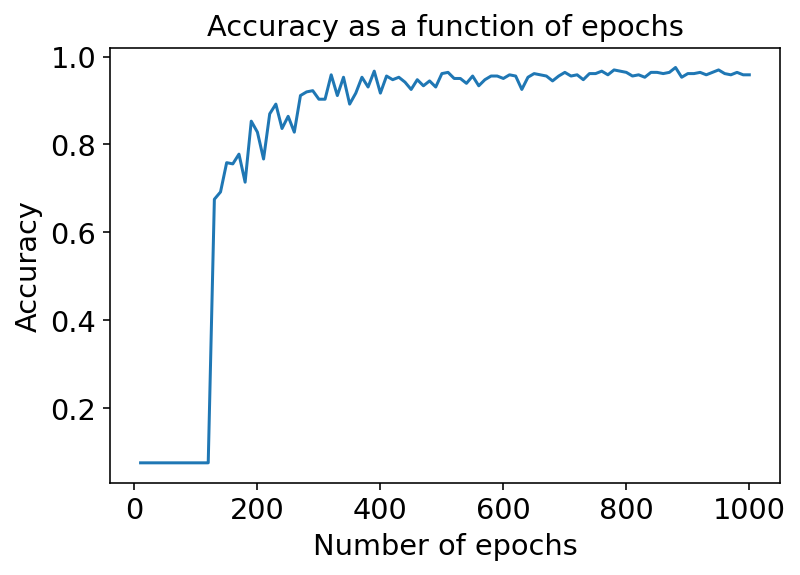

In [7]:
plt.plot(epochs, acc)
plt.title('Accuracy as a function of epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

In [90]:
#see how accuracy changes with lambda
lmbda = np.linspace(1e-6, 1e-1, 30)
acc = []

for l in lmbda:
    lr = MultiClassLogisticRegression()
    lr.fit(X_train, y_train, epochs=1000, M=128, eta=0.001, lamb=int(l))
    y_pred = lr.predict_classes(X_test)
    acc.append(lr.accuracy(X_test, y_test))

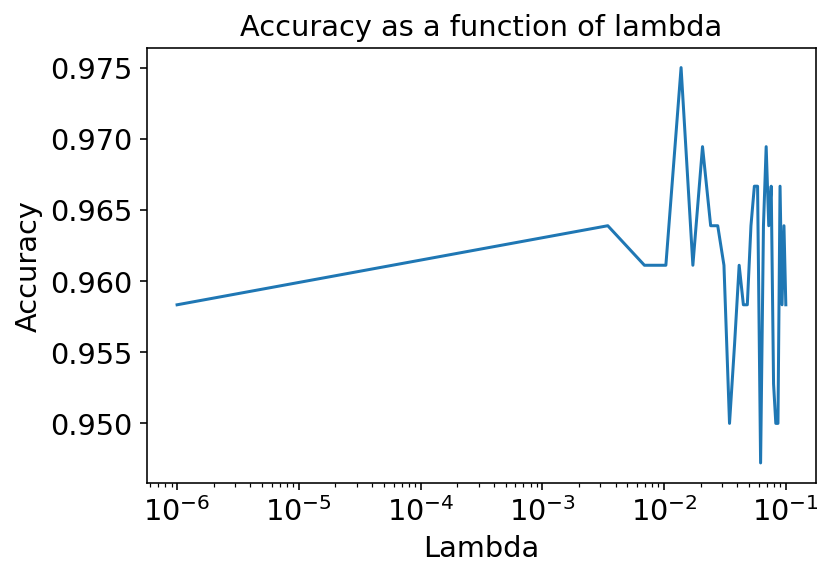

In [91]:
plt.plot(lmbda, acc)
plt.title('Accuracy as a function of lambda')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

In [92]:
best_lambda = lmbda[np.argmax(acc)]
best_lambda

0.01379396551724138

In [93]:
acc

[0.9583333333333334,
 0.9638888888888889,
 0.9611111111111111,
 0.9611111111111111,
 0.975,
 0.9611111111111111,
 0.9694444444444444,
 0.9638888888888889,
 0.9638888888888889,
 0.9611111111111111,
 0.95,
 0.9555555555555556,
 0.9611111111111111,
 0.9583333333333334,
 0.9583333333333334,
 0.9638888888888889,
 0.9666666666666667,
 0.9666666666666667,
 0.9472222222222222,
 0.9638888888888889,
 0.9694444444444444,
 0.9638888888888889,
 0.9666666666666667,
 0.9527777777777777,
 0.95,
 0.95,
 0.9666666666666667,
 0.9583333333333334,
 0.9638888888888889,
 0.9583333333333334]

In [94]:
#testing multiclass logistic regression on the digit datasets, without regularization parameter
lr = MultiClassLogisticRegression()
lr.fit(X_train, y_train, epochs=1000, M = 128, eta = 0.001, lamb=best_lambda)
y_pred = lr.predict_classes(X_test)
print(lr.accuracy(X_test, y_test))

0.9638888888888889
